###  Практическоe заданиe 2

### Библиотеки

In [55]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import math

### 1. Определить тип данных для каждого из столбцов файла 02_Автоаварии.xls.

In [54]:
PATH = 'D:/Educational Cources/Наглядный вероятностно-статистический анализ данных/data-analytics/lab2/'
data = pd.read_excel(PATH + "02_Автоаварии.xls")
list(data.columns)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Distance(mi)',
 'Description',
 'Street',
 'Side',
 'City',
 'State',
 'Zipcode',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight']

a. Дискретные количественные данные:
* TMC
* Severity
* Weather_Timestamp
* Humidity(%)
* Pressure(in)
* Visibility(mi)
b. Номинальные качественные данные:
* Source
* Description
* Side
* City
* State
* Wind_Direction
* Weather_Condition
c. Ординальные качественные данные:
* ID
d. Качественные данные:
* Description
e. Непрерывные количественные данные:
* Start_Time
* End_Time
* Distance(mi)
* Temperature(F)
* Wind_Chill(F)
* Wind_Speed(mph)
* Precipitation(in)

f. Дихотомические качественные данные:
* Bump
* Crossing
* Give_Way
* Junction
* No_Exit
* Railway
* Roundabout
* Station
* Stop
* Traffic_Calming
* Traffic_Signal
* Turning_Loop
* Sunrise_Sunset
* Civil_Twilight

### 2. Изучить распределение случайных величин – видимость дороги в момент совершения аварии (Visibility) и 1, 2, 3, 4 – видимость дороги в момент совершения аварии степени серьезности 1, 2, 3, 4 (Severity). Выбрать инструмент Python для решения задачи (matplotlib.pyplot.hist(), seaborn.distplot() или seaborn.kdeplot()), построить гистограммы и функции распределения величин

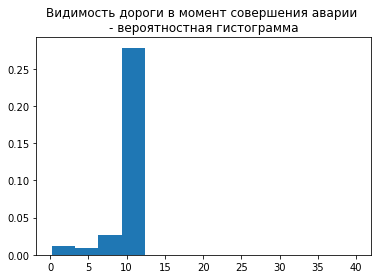

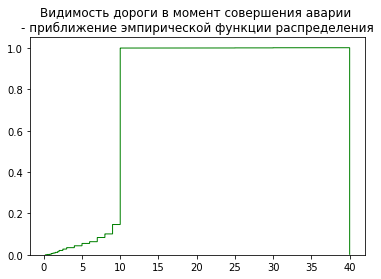

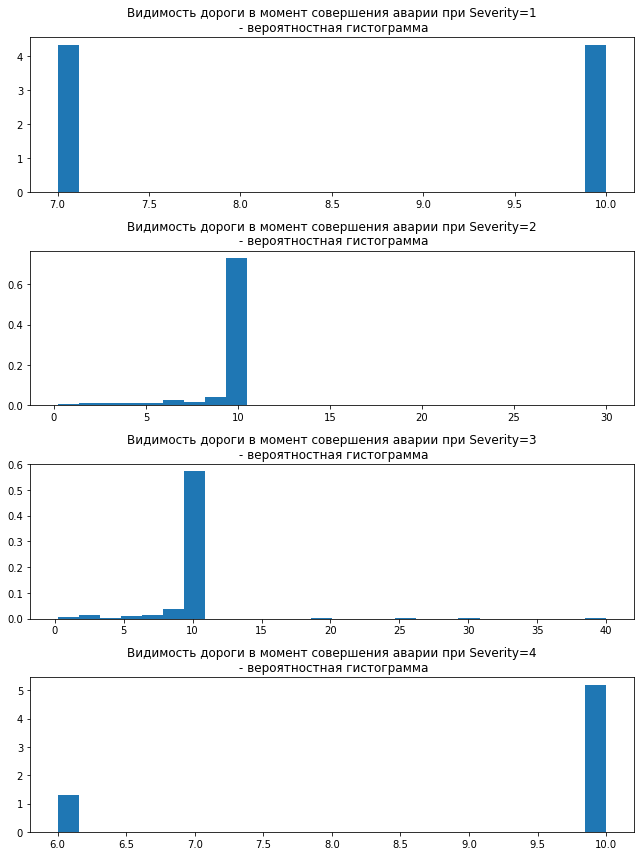

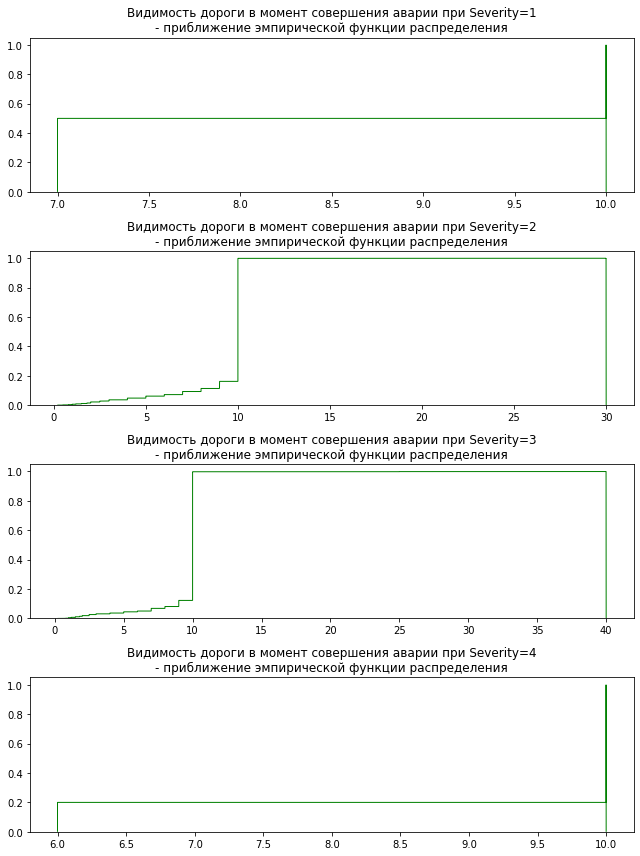

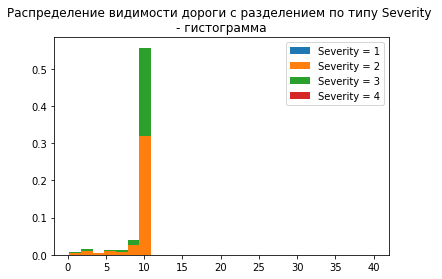

In [59]:
k = int(math.log(data.shape[0], 2)) + 1
plt.hist(data[["Visibility(mi)"]], bins=k, density=True)
plt.title("Видимость дороги в момент совершения аварии \n- вероятностная гистограмма")
plt.show()
plt.hist(data["Visibility(mi)"], bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True)
plt.title("Видимость дороги в момент совершения аварии \n- приближение эмпирической функции распределения")
plt.show()
fig, axes = plt.subplots(nrows=4, figsize=(9, 12))
for i in range(4):
 axes[i].hist(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], bins=2*k, density
=True)
 axes[i].set_title("Видимость дороги в момент совершения аварии при Severity="
 + str(i + 1) + "\n - вероятностная гистограмма")
fig.tight_layout()
plt.show()
fig, axes = plt.subplots(nrows=4, figsize=(9, 12))
# data.loc[data["Severity"] == i + 1]["Visibility(mi)"] - list of Visibility where Severity == i + 1
for i in range(4):
 axes[i].hist(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], bins=data.shape[0], color='green',
 cumulative=True, histtype='step', density=True)
 axes[i].set_title("Видимость дороги в момент совершения аварии при Severity="
 + str(i + 1) + "\n- приближение эмпирической функции распределения")
fig.tight_layout()
plt.show()
eps = [] # list of lists of visibility for each value of Severity
labels = []
for i in range(4):
 eps.append(data.loc[data["Severity"] == i + 1]["Visibility(mi)"])
 labels.append("Severity = " + str(i + 1))
plt.hist(eps, bins=2*k, label=labels, density=True, histtype='bar', stacked=True)
plt.legend()
plt.title("Распределение видимости дороги с разделением по типу Severity \n- гистограмма")
plt.show()

### 3. Построить вариационный ряд и статистический ряд для величины – температура воздуха в момент совершения аварии (Temperature),построить группированный статистический ряд.

Вариационный ряд:  [3.9, 5.0, 6.1, 7.0, 7.0, 7.0, 7.5, 7.5, 8.1, 9.0, 10.0, 10.0, 10.4, 10.9, 10.9, 12.0, 12.0, 12.0, 12.0, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 13.6, 13.6, 14.0, 14.0, 14.0, 15.1, 15.1, 15.4, 15.4, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.2, 17.1, 17.1, 17.1, 17.1, 17.6, 17.6, 18.0, 18.0, 18.0, 18.5, 19.0, 19.0, 19.0, 19.0, 19.9, 19.9, 19.9, 19.9, 19.9, 19.9, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.2, 21.2, 21.2, 21.6, 21.6, 21.9, 21.9, 21.9, 21.9, 21.9, 21.9, 21.9, 21.9, 22.5, 22.5, 22.5, 22.8, 22.8, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.1, 24.1, 24.1, 24.1, 24.1, 24.1, 24.8, 24.8, 24.8, 24.8, 25.0, 25.0, 25.0, 25.0, 25.0, 25.2, 25.5, 25.9, 25.9, 25.9, 26.1, 26.1, 26.1, 26.1, 26.6, 26.6, 26.6, 26.6, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.9, 27.9, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.4, 28.4, 28.4, 28.9, 28.9, 28.9, 28.9, 

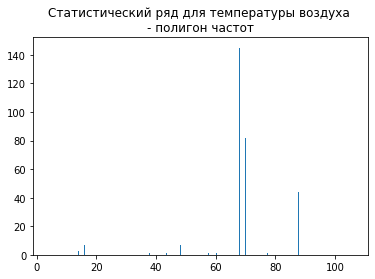

(array([0.00038367, 0.00120216, 0.00222527, 0.00511555, 0.00289029,
        0.00209738, 0.01222618, 0.02534757, 0.02299442, 0.02197131,
        0.014963  , 0.00987302, 0.00603635]),
 array([  3.9       ,  11.75384615,  19.60769231,  27.46153846,
         35.31538462,  43.16923077,  51.02307692,  58.87692308,
         66.73076923,  74.58461538,  82.43846154,  90.29230769,
         98.14615385, 106.        ]),
 <BarContainer object of 13 artists>)

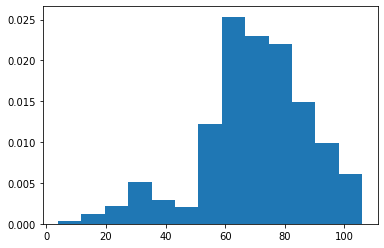

In [61]:
variation_range = list(data["Temperature(F)"])
variation_range.sort()
print("Вариационный ряд: ", variation_range)
statistic_range = sorted(Counter(variation_range).items(), key=lambda a : a[0])
print("Статистический ряд: ", statistic_range)
plt.hist(variation_range, bins=len(variation_range))
plt.title("Статистический ряд для температуры воздуха \n- полигон частот")
plt.show()
plt.hist(variation_range, bins=k, density=True)

### 4. Определить 5 городов с наибольшим количеством автомобильных аварий за наблюдаемый период. Построить функции распределения случайных величин i - протяженность участка дороги, задействованного при аварии (Distance), в i-ом городе из данного списка, i = 1, 2, …, 5

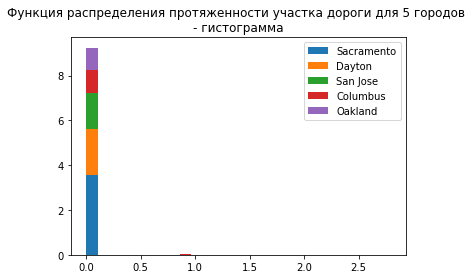

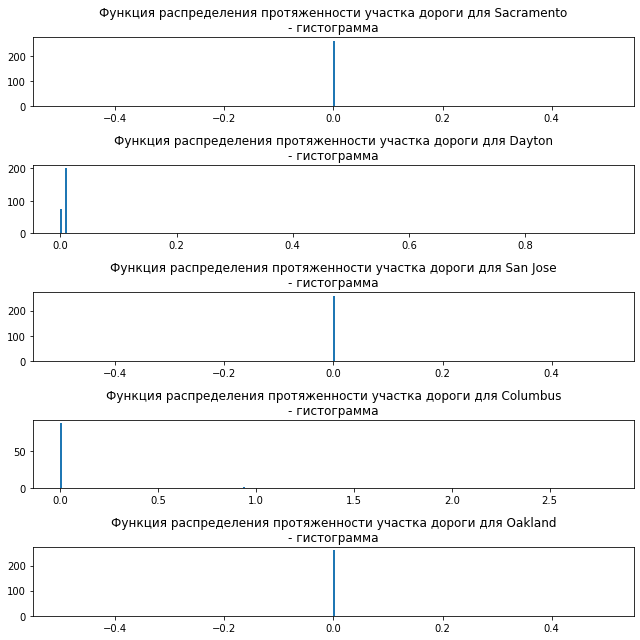

In [62]:
d = list(sorted(Counter(data["City"]).items(), key=lambda a : a[1], reverse=True))
cities = []
for item in d[:5]:
 cities.append(item[0])
eps = []
for city in cities:
 eps.append(data.loc[data["City"] == city]["Distance(mi)"])
plt.hist(eps, bins=2*k, label=cities, density=True, histtype='bar', stacked=True)
plt.legend()
plt.title("Функция распределения протяженности участка дороги для 5 городов \n- гистограмма")
plt.show()
fig, axes = plt.subplots(5, figsize=(9, 9))
for i in range(5):
 axes[i].hist(eps[i], bins=20*k, density=True)
 axes[i].set_title("Функция распределения протяженности участка дороги для " + cities[i] +
"\n- гистограмма")
fig.tight_layout()
plt.show()